<a href="https://colab.research.google.com/github/rushikeshmarkad8265/Machine-Learning/blob/main/hidden%20markov%20model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Rushikesh Markadp
#ROLL NO: CS3162
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from hmmlearn import hmm

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
states = ["Sunny", "Rainy"]
n_states = len(states)
print('Number of hidden states :',n_states)
observations = ["Dry", "Wet"]
n_observations = len(observations)
print('Number of observations :',n_observations)

Number of hidden states : 2
Number of observations : 2


In [ ]:
state_probability = np.array([0.6, 0.4])
print("State probability: ", state_probability)
transition_probability = np.array([[0.7, 0.3],
[0.3, 0.7]])
print("\nTransition probability:\n", transition_probability)
emission_probability= np.array([[0.9, 0.1],
[0.2, 0.8]])
print("\nEmission probability:\n", emission_probability)

State probability:  [0.6 0.4]

Transition probability:
 [[0.7 0.3]
 [0.3 0.7]]

Emission probability:
 [[0.9 0.1]
 [0.2 0.8]]


In [ ]:
model = hmm.CategoricalHMM(n_components=n_states)
model.startprob_ = state_probability
model.transmat_ = transition_probability
model.emissionprob_ = emission_probability

In [ ]:
observations_sequence = np.array([0, 0, 1]).reshape(-1, 1)
observations_sequence

array([[0],
       [0],
       [1]])

In [ ]:
hidden_states = model.predict(observations_sequence)
print("Most likely hidden states:", hidden_states)


Most likely hidden states: [0 0 1]


In [ ]:
log_probability, hidden_states = model.decode(observations_sequence,
lengths=len(observations_sequence),
algorithm='viterbi' )

In [ ]:
print('Log Probability :',log_probability)
print("Most likely hidden states:", hidden_states)

Log Probability : -2.5053379546605217
Most likely hidden states: [0 0 1]


In [ ]:
observations_sequence = [0, 0, 1]

In [ ]:
forward_prob = forward(observations_sequence, transition_probability,
                       emission_probability,state_probability)
viterbi_prob, viterbi_path = viterbi(observations_sequence,transition_probability,
                                     emission_probability,state_probability)
print("Forward Algorithm: Probability of Observations =", forward_prob)
print("Viterbi Algorithm: Best Path Probability =", viterbi_prob)
print("Most Likely State Sequence =", viterbi_path)


Forward Algorithm: Probability of Observations = 0.137882
Viterbi Algorithm: Best Path Probability = 0.081648
Most Likely State Sequence = ['Sunny', 'Sunny', 'Rainy']


In [ ]:
observations_sequence = np.array([0, 1, 0, 1, 0, 0]).reshape(-1, 1)
observations_sequence

array([[0],
       [1],
       [0],
       [1],
       [0],
       [0]])

In [ ]:
# Predict the most likely sequence of hidden states
hidden_states = model.predict(observations_sequence)
print("Most likely hidden states:", hidden_states)

Most likely hidden states: [0 1 1 1 0 0]


In [ ]:
log_probability, hidden_states = model.decode(observations_sequence,
lengths =len(observations_sequence),
algorithm ='viterbi' )

In [ ]:
print('Log Probability :',log_probability)
print("Most likely hidden states:", hidden_states)

Log Probability : -6.360602626270058
Most likely hidden states: [0 1 1 1 0 0]


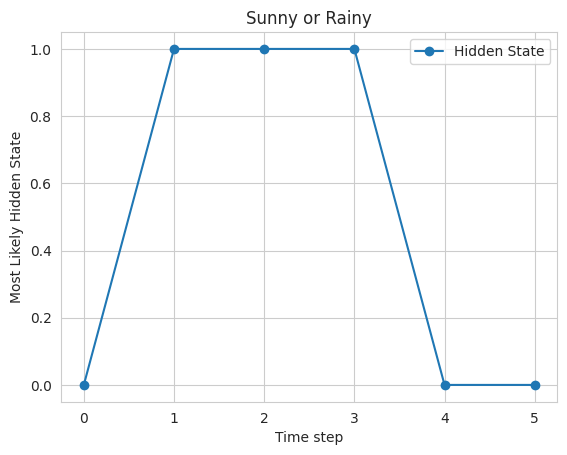

In [ ]:
sns.set_style("whitegrid")
plt.plot(hidden_states, '-o', label="Hidden State")
plt.xlabel('Time step')
plt.ylabel('Most Likely Hidden State')
plt.title("Sunny or Rainy")
plt.legend()
plt.show()

In [ ]:
# Forward algorithm: probability of the observation sequence
log_prob_forward = model.score(observations_sequence)
print("Log Probability (Forward Algorithm):", log_prob_forward)
# Viterbi algorithm: most likely hidden states
log_prob_viterbi, hidden_states = model.decode(observations_sequence,algorithm="viterbi")
print("Log Probability (Viterbi Algorithm):", log_prob_viterbi)
print("Most Likely Hidden States:", hidden_states)


Log Probability (Forward Algorithm): -4.547423454363216
Log Probability (Viterbi Algorithm): -6.360602626270058
Most Likely Hidden States: [0 1 1 1 0 0]


In [ ]:
#Second Example
states = ["Rainy", "Sunny"]
observations = ["Walk", "Shop", "Clean"]
obs_seq = [0, 1, 2] # Walk=0, Shop=1, Clean=2

In [ ]:
pi = np.array([0.6, 0.4]) # Initial probabilities
A = np.array([[0.7, 0.3],
              [0.4, 0.6]])    # Transition matrix
B = np.array([[0.1, 0.4, 0.5],
              [0.6, 0.3, 0.1]])   # Emission matrix

In [ ]:
def forward(obs_seq, A, B, pi):
    N = len(A) # number of states
    T = len(obs_seq) # length of observation sequence
    alpha = np.zeros((T, N))
    # Initialization
    alpha[0] = pi * B[:, obs_seq[0]]
    # Induction
    for t in range(1, T):
        for j in range(N):
            alpha[t, j] = np.sum(alpha[t-1] * A[:, j]) * B[j, obs_seq[t]]
    # Termination
    return np.sum(alpha[T-1])

In [ ]:
def viterbi(obs_seq, A, B, pi):
    N = len(A)
    T = len(obs_seq)
    delta = np.zeros((T, N))
    psi = np.zeros((T, N), dtype=int)
    # Initialization
    delta[0] = pi * B[:, obs_seq[0]]
    # Recursion
    for t in range(1, T):
        for j in range(N):
            seq_probs = delta[t-1] * A[:, j]
            psi[t, j] = np.argmax(seq_probs)
            delta[t, j] = np.max(seq_probs) * B[j, obs_seq[t]]
    # Termination
    best_path_prob = np.max(delta[T-1])
    best_last_state = np.argmax(delta[T-1])
    # Backtracking
    best_path = [best_last_state]
    for t in range(T-1, 0, -1):
        best_last_state = psi[t, best_last_state]
        best_path.insert(0, best_last_state)
    return best_path_prob, [states[i] for i in best_path]

In [ ]:
forward_prob = forward(obs_seq, A, B, pi)
viterbi_prob, viterbi_path = viterbi(obs_seq, A, B, pi)
print("Forward Algorithm: Probability of Observations =", forward_prob)
print("Viterbi Algorithm: Best Path Probability =", viterbi_prob)
print("Most Likely State Sequence =", viterbi_path)


Forward Algorithm: Probability of Observations = 0.033612
Viterbi Algorithm: Best Path Probability = 0.01344
Most Likely State Sequence = ['Sunny', 'Rainy', 'Rainy']
